<a href="https://colab.research.google.com/github/andres-merino/Curso-FundMachineLearning/blob/main/3-Notebooks/03-1-Conjuntos-Entrenamiento-Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i0.wp.com/see-ec.org/wordpress/wp-content/uploads/2023/01/LOGO-SEE-texto-blanco-3.png?w=1356&ssl=1" width="200">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#008dc3" size="7">|</font><br>
            <font color="#008dc3" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#008dc3" size="5">
                <b>Sociedad Ecuatoriana de Estadística</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#008dc3" size="4">
                Fundamentos de Machine Learning &bull; Conjuntos de Entrenamiento y Prueba
            </font></p>
            <p style="font-style: oblique;"><font color="#008dc3" size="3">
                Andrés Merino &bull; Febrero 2026
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='008dc3'> Introducción </font>

Este cuaderno está diseñado para explorar la división de conjuntos de datos. Utilizaremos el conjunto de datos `ingCountyHouseData`. Los objetivos principales son:

- Dividir conjuntos de datos en entrenamiento y prueba.
- Analizar cómo se distribuyen las clases en estos conjuntos.

De manera general, la generación de un modelo, se descompone en dos fases principales:
- **Entrenamiento**: En esta fase, el modelo aprende a partir de un conjunto de datos etiquetado. El objetivo es que el modelo capture patrones y relaciones en los datos para hacer predicciones precisas.
- **Prueba**: En esta fase, el modelo se evalúa utilizando un conjunto de datos separado que no se utilizó durante el entrenamiento. Esto permite medir la capacidad del modelo para generalizar y hacer predicciones precisas en datos nuevos.

<img src="https://andres-merino.github.io/Curso-FundMachineLearning/3-Notebooks/img/img02.png" alt="Img02" style="max-width:800px; height:auto;">

Los paquetes necesarios son:

In [4]:
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.preprocessing import StandardScaler # Normalización de datos
from sklearn.linear_model import LinearRegression # Modelo de regresión lineal

# División de datos
from sklearn.model_selection import train_test_split 

---
## <font color='008dc3'> Lectura de datos </font>


Leemos el conjunto de datos y mostramos las primeras filas.

In [5]:
# Cargar el conjunto de datos
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)
# Seleccionar las columnas de interés
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price'] # Defino las columnas que quiero usar
df = df.loc[:, columns] # Selecciono solo las columnas que quiero usar
display(df.head(10)) # Mostrar las primeras 10 filas del DataFrame

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0
5,4,4.50,5420,101930,1.0,1225000.0
6,3,2.25,1715,6819,2.0,257500.0
7,3,1.50,1060,9711,1.0,291850.0
8,3,1.00,1780,7470,1.0,229500.0
9,3,2.50,1890,6560,2.0,323000.0


---
## <font color='008dc3'> Características y etiquetas </font>

Ahora, separamos las características y las etiquetas.

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/6_train-test-split.jpg)


In [ ]:
# Dividir el conjunto de datos en características y etiquetas
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
X = df.loc[:, features] # Características (X)
y = df.loc[:, ['price']] # Etiqueta (y)

---
## <font color='008dc3'> Conjunto de entrenamiento y prueba </font>

Con esto, dividimos los datos en dos conjuntos: uno para entrenamiento y otro para prueba.

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/7_train-test-split.jpg)

In [7]:
# Dividir datos en entrenamiento y prueba
# El comando devuelve cuatro conjuntos de datos: X_train, X_test, y_train, y_test
# test_size=0.2 indica que el 20% de los datos se utilizarán para la prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=None, random_state=0)

Ahora, visualizamos el tamaño de los conjuntos de entrenamiento y prueba.

In [8]:
# Reviso las dimensiones de los conjuntos de datos
print('Dimensiones de los conjuntos de datos:')
# shape devuelve una tupla con el número de filas y columnas de un DataFrame
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Dimensiones de los conjuntos de datos:
X_train: (17290, 5)
y_train: (17290, 1)
X_test: (4323, 5)
y_test: (4323, 1)


Para visualizar la distribución de las clases en los conjuntos de entrenamiento y prueba, utilizamos un histograma.

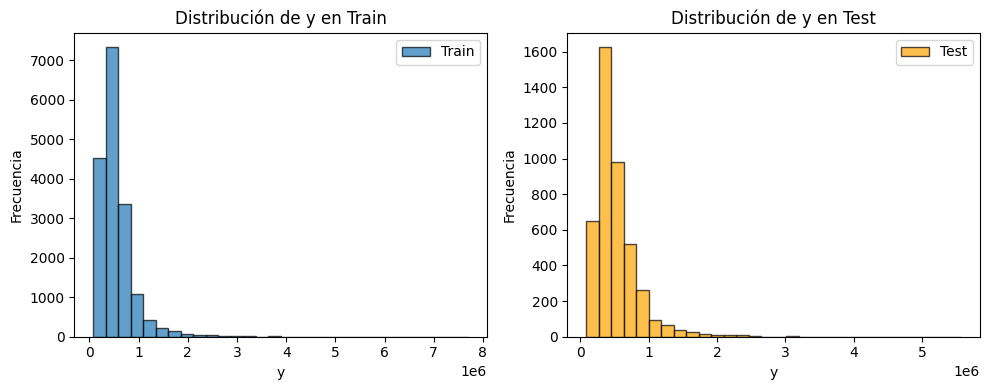

In [9]:
# Grafico la distribución de las clases en el conjunto de entrenamiento y prueba
plt.figure(figsize=(10, 4))

# Histograma para y_train
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, alpha=0.7, edgecolor='black', label='Train')
plt.title('Distribución de y en Train')
plt.xlabel('y')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma para y_test
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, alpha=0.7, edgecolor='black', label='Test', color='orange')
plt.title('Distribución de y en Test')
plt.xlabel('y')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()


---

<div style="background-color: #edf1f8; border-color: #008dc3; border-left: 5px solid #008dc3; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Genera varias divisiones del conjunto de datos con diferentes tamaños de prueba (por ejemplo, 10%, 20%, 30%) y analiza cómo cambia la distribución de las clases en los conjuntos de entrenamiento y prueba.
</div>

---

<div style="background-color: #edf1f8; border-color: #008dc3; border-left: 5px solid #008dc3; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usa diferentes valores de `random_state` al dividir los datos y observa cómo afecta la distribución de las clases en los conjuntos de entrenamiento y prueba.
</div>

---